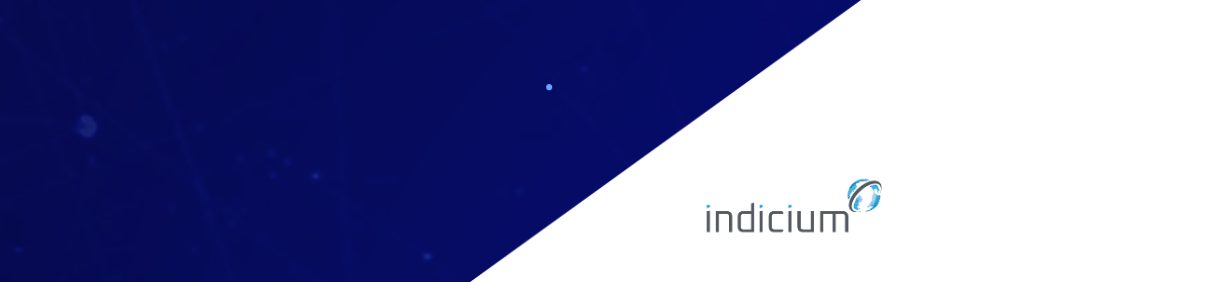


# DESAFIO CIENTISTA DE DADOS

###### Autora: Aline de Castro Santos
###### Data: Janeiro de 2024



# **1. INTRODUÇÃO**

>Este projeto de ciência de dados foi desenvolvido para abordar um desafio proposto pela Indicium, uma empresa que está trabalhando na criação de uma plataforma de aluguéis temporários na cidade de Nova York. O objetivo principal é desenvolver um modelo preditivo para prever os preços dos aluguéis com base em um conjunto de dados fornecido.

>Este projeto é uma oportunidade para explorar conceitos estatísticos de modelos preditivos, aplicar criatividade na resolução de problemas e utilizar modelos básicos de machine learning.



## **1.1 A base de dados**

> O conjunto de dados, denominado `teste_indicium_precificacao.csv`, contém informações detalhadas sobre os anúncios de aluguel, incluindo características como localização, tipo de quarto, preço por noite, número mínimo de noites, número de comentários, entre outros. A análise desses dados permitirá a criação de um modelo que pode prever os preços dos aluguéis, o que é crucial para a estratégia de precificação da plataforma.





## 1.2 Descrição das variáveis

- `id`: Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo.
- `nome`: Representa o nome do anúncio.
- `host_id`: Representa o id do usuário que hospedou o anúncio.
- `host_name`: Contém o nome do usuário que hospedou o anúncio.
- `bairro_group`: Contém o nome do bairro onde o anúncio está localizado.
- `bairro`: Contém o nome da área onde o anúncio está localizado.
- `latitude`: Contém a latitude do local.
- `longitude`: Contém a longitude do local.
- `room_type`: Contém o tipo de espaço de cada anúncio.
- `price`: Contém o preço por noite em dólares listado pelo anfitrião.
- `minimo_noites`: Contém o número mínimo de noites que o usuário deve reservar.
- `numero_de_reviews`: Contém o número de comentários dados a cada listagem.
- `ultima_review`: Contém a data da última revisão dada à listagem.
- `reviews_por_mes`: Contém o número de avaliações fornecidas por mês.
- `calculado_host_listings_count`: Contém a quantidade de listagem por host.
- `disponibilidade_365`: Contém o número de dias em que o anúncio está disponível para reserva.


# **2. BIBLIOTECAS NECESSÁRIAS**

In [57]:
# Importando as bibliotecas necessárias

import pandas as pd  # Para manipulação e análise de dados estruturados
import numpy as np  # Para realizar operações matemáticas e manipular arrays
import matplotlib.pyplot as plt  # Para criação de gráficos estáticos, animados e interativos
import seaborn as sns  # Para criação de gráficos estatísticos mais atraentes e informativos
import scipy.stats as stats  # Para realizar cálculos estatísticos e operações matemáticas
import plotly.express as px  # Para criação de gráficos interativos
import plotly.subplots as sp  # Para criação de subplots em gráficos Plotly
import plotly.graph_objs as go  # Para criação de gráficos Plotly de baixo nível
import statsmodels.formula.api as smf  # Para criação de modelos estatísticos e execução de testes estatísticos
import statsmodels.api as sm  # Para acesso a funções estatísticas completas
from wordcloud import WordCloud  # Para visualização de dados de texto através de nuvens de palavras
from sklearn.model_selection import train_test_split  # Para dividir dados em conjuntos de treinamento e teste
from sklearn.linear_model import LinearRegression  # Para realizar regressão linear
from sklearn.metrics import mean_squared_error  # Para calcular o erro quadrático médio, uma métrica de avaliação de modelo
import pickle  # Para serializar e desserializar objetos Python, permitindo que os objetos sejam salvos e carregados


# Configuração para exibir gráficos diretamente no notebook
%matplotlib inline

# **3. CARREGANDO A BASE DE DADOS**

In [107]:
# Carregando os dados
df = pd.read_csv('teste_indicium_precificacao.csv')

# Visualização das primeiras cinco linhas do DataFrame
df.head()


id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

# **4. ANÁLISE EXPLORATÓRIA DOS DADOS**

## **4.1 Descrição dos dados**

In [59]:
# Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [60]:
# Descrição estatística das variáveis numéricas
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

In [61]:
# Dimensionalidade do DataFrame (número de linhas, número de colunas)
df.shape

(48894, 16)

In [108]:
# Número de valores nulos em cada coluna
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

As colunas *'nome'* e *'host_name'* serão substituídas por *'Desconhecido'* e a coluna *'reviews_por_mes'* será substituída por *0*.
> Essa substituição é realizada porque *'nome'* e *'host_name'* são variáveis categóricas e a substituição por *'Desconhecido'* permite manter a integridade dos dados sem adicionar informações tendenciosas.
> Para a coluna *'reviews_por_mes'*, a substituição por 0 é justificada pelo fato de que a ausência de uma revisão pode ser interpretada como nenhuma revisão feita naquele mês, portanto, *0* é um valor adequado.

In [197]:
# Substituindo valores nulos
df['nome'].fillna('Desconhecido', inplace=True)
df['host_name'].fillna('Desconhecido', inplace=True)
df['reviews_por_mes'].fillna(0, inplace=True)

A coluna *'ultima_review'* contém datas, mas é do tipo *'object'*.
>Para facilitar a manipulação e análise desses dados, esta coluna será convertida para o tipo de dados *datetime*.

In [198]:
# Convertendo a coluna 'ultima_review' para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [65]:
# Verificando os tipos de dados de cada coluna
df.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                             object
bairro                                   object
latitude                                float64
longitude                               float64
room_type                                object
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

## **4.2 Matriz de correlação**

In [67]:
# Correlação entre variáveis
# Gerando um mapa de calor da matriz de correlação
fig = px.imshow(df.corr(), color_continuous_scale='viridis', title='Matriz de Correlação')
# Mostrando a figura
fig.show()

<ipython-input-67-2a3025aae55a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Algumas observações baseadas na matriz de correlação entre diferentes variáveis no conjunto de dados:

- `id` e `host_id` têm uma correlação positiva moderada (0.588282), o que indica que os IDs dos anúncios e dos anfitriões podem estar de alguma forma relacionados.
- `numero_de_reviews` e `reviews_por_mes` têm uma forte correlação positiva (0.589406), o que faz sentido, pois um maior número de revisões por mês provavelmente levará a um maior número total de revisões.
- `longitude` e `price` têm uma correlação negativa moderada (-0.150020), o que pode indicar que os preços tendem a ser menores em áreas com longitudes maiores. No entanto, essa relação pode não ser direta e pode ser influenciada por outros fatores, como o bairro ou o tipo de quarto.
- `disponibilidade_365` tem uma correlação positiva moderada com `calculado_host_listings_count` (0.225711) e `host_id` (0.203535), o que pode sugerir que anfitriões com mais listagens ou anfitriões mais antigos na plataforma tendem a ter suas listagens disponíveis por mais dias no ano.



## **4.3 Visualização da distribuição dos dados**


### 4.3.1 Distribuição de dados das variáveis numéricas


>Histogramas para cada variável numérica (‘price’, ‘minimo_noites’, ‘numero_de_reviews’, ‘reviews_por_mes’, ‘calculado_host_listings_count’, ‘disponibilidade_365’),  para entender a distribuição dos dados

In [97]:
# Verificando a distribuição do preço por noite
fig1 = px.histogram(df, x='price', nbins=30, title='Distribuição de Preços')
fig1.update_layout(xaxis_title='Preço', yaxis_title='Frequência')
fig1.show()

A partir do gráfico, pode-se observar que a maioria dos preços está concentrada no extremo inferior da escala. Há uma frequência muito alta de aluguéis com preços próximos entre 0 e 499 dolares.
> Isso sugere que a maioria dos imóveis tem preços baixos.

In [88]:
# Verificando a quantidade de  mínimo de noites que o usuário deve reservar
fig2 = px.histogram(df, x='minimo_noites', nbins=30, title='Distribuição de Mínimo de Noites')
fig2.update_layout(xaxis_title='Mínimo de Noites', yaxis_title='Frequência')
fig2.show()


A partir do gráfico, pode-se observar que a maioria das reservas exige um número muito baixo de noites mínimas. Há uma frequência muito alta de estadias com um requisito de noites mínimas entre 0 e 49.
> Isso sugere que a maioria dos imóveis tem requisitos de estadia mínima baixos.

In [89]:
# Verificando o número de comentários dados a cada listagem
fig3 = px.histogram(df, x='numero_de_reviews', nbins=30, title='Distribuição de Número de Reviews')
fig3.update_layout(xaxis_title='Número de Reviews', yaxis_title='Frequência')
fig3.show()


A partir do gráfico, podemos observar que a maioria dos imóveis tem um número muito baixo de reviews. Há uma frequência muito alta de reviews entre 0 e 49.
> Isso sugere que a maioria dos imóveis tem poucos reviews.

In [90]:
# Verificando o número de avaliações fornecidas por mês
fig4 = px.histogram(df, x='reviews_por_mes', nbins=30, title='Distribuição de Reviews por Mês')
fig4.update_layout(xaxis_title='Reviews por Mês', yaxis_title='Frequência')
fig4.show()


A partir do gráfico, podemos observar que a maioria dos imóveis tem um número muito baixo de reviews por mês. Há uma frequência muito alta de reviews por mês entre 0 e 99. Isso sugere que a maioria dos imóveis recebe poucos reviews por mês.

In [91]:
# Verificando a quantidade de listagem por host
fig5 = px.histogram(df, x='calculado_host_listings_count', nbins=30, title='Distribuição de Listagens do Host Calculadas')
fig5.update_layout(xaxis_title='Listagens do Host Calculadas', yaxis_title='Frequência')
fig5.show()


Pode-se observar que a maioria dos hosts tem um número muito baixo de listagens calculadas. Há uma frequência muito alta de hosts com um número de listagens entre 0 e 19.
> Isso sugere que a maioria dos hosts tem poucas listagens.

In [92]:
# Dias em que o anúncio está disponível para reserva
fig6 = px.histogram(df, x='disponibilidade_365', nbins=30, title='Distribuição de Disponibilidade 365')
fig6.update_layout(xaxis_title='Disponibilidade 365', yaxis_title='Frequência')
fig6.show()

Nota-se que a maioria dos imóveis tem uma disponibilidade muito baixa ou muito alta ao longo de um ano. Há uma frequência muito alta de imóveis com uma disponibilidade próxima a 0 e outra frequência alta próxima a 350 dias.
> Isso sugere que a maioria dos imóveis ou está disponível quase o ano todo ou raramente está disponível.

### 4.3.2 Distribuição Geográfica dos Imóveis

In [111]:
# Distribuição Geográfica dos Imóveis com indicação dos preços
fig7 = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        color='price',
                        size='price',
                        color_continuous_scale='viridis',
                        title='Distribuição Geográfica dos Imóveis',
                        mapbox_style="carto-positron")

fig7.show()


A imagem mostra um mapa de distribuição geográfica das propriedades, indicando seus preços. O mapa mostra partes de Nova Jersey e Nova York, incluindo cidades como Newark e Elizabeth.

As propriedades são representadas por pontos coloridos que estão codificados de acordo com a escala de preços indicada à direita. A escala de cores varia de roxo (preço baixo) a amarelo (preço alto).

A partir deste mapa, pode-se visualizar a distribuição geográfica das propriedades e ter uma ideia geral dos preços em diferentes áreas.

In [113]:
# Gráfico de dispersão para longitude e price
fig8 = px.scatter(df, x='longitude', y='price', title='Correlação entre longitude e price')
fig8.update_layout(xaxis_title='longitude', yaxis_title='price')
fig8.show()

Há uma concentração de dados em torno da faixa de preço mais baixa, particularmente entre as longitudes de aproximadamente -74 e -73,9.
> Indica que a longitude tem algum impacto significativo no preço.

In [116]:
# Gráfico de dispersão para latitude e price
fig9 = px.scatter(df, x='latitude', y='price', title='Correlação entre latitude e price')
fig9.update_layout(xaxis_title='latitude', yaxis_title='price')
fig9.show()

A partir do gráfico, observa-se que a maioria dos pontos de dados está concentrada na extremidade inferior da faixa de preço, indicando que muitos aluguéis têm preços relativamente baixos. Além disso, não parece haver uma correlação forte entre a latitude e o preço, pois os pontos de dados estão amplamente dispersos.
>Isso sugere que a latitude, por si só, pode não ser um bom indicador do preço.

### 4.3.3 Comparação entre variáveis

In [136]:
# Calculando o preço médio por bairro
preco_medio_por_bairro = df.groupby('bairro')['price'].mean().reset_index()

# Ordenando os dados
preco_medio_por_bairro = preco_medio_por_bairro.sort_values('price', ascending=False)

# Criando o gráfico de barras
fig10 = px.bar(preco_medio_por_bairro, x='bairro', y='price', title='Preço médio por bairro')
10.show()

 Há uma ampla gama de preços médios entre diferentes bairros. Alguns bairros têm preços médios significativamente mais altos em comparação com outros, como, por exemplo, Fort Wadsworth. Isso pode ser devido a vários fatores, como localização, comodidades, demanda, etc.

In [114]:
# Boxplot por tipo de quarto
fig11 = px.box(df, x='room_type', y='price', title='Preços por Tipo de Quarto')
fig11.update_layout(xaxis_title='Tipo de Quarto', yaxis_title='Preço')
fig11.show()


A visualização da distribuição de preços para três tipos diferentes de quartos indica que:
  - **Casa/Apto inteiro:** A mediana do preço está em torno de 2k. Existem muitos outliers que se estendem até aproximadamente 10k.
  - **Quarto privado:** A mediana do preço é menor do que a de casas/apartamentos inteiros, mas também tem outliers que se estendem até aproximadamente 8k.
  - **Quarto compartilhado:** Tem o menor preço mediano com menos outliers e de menor valor em comparação com as outras duas categorias.

Com base nesta análise do boxplot:
- A Casa/Apto inteiro normalmente custa mais, com uma mediana de preço mais alta e outliers mais caros.
- Os quartos privados geralmente são mais baratos do que alugar uma casa ou apartamento inteiro, mas ainda podem ser bastante caros, como indicado por vários outliers de alto valor.
- Os quartos compartilhados são a opção mais barata, com uma baixa mediana de preço e outliers de baixo valor.



In [115]:
# Análise de disponibilidade
fig12 = px.scatter(df, x='disponibilidade_365', y='price', title='Disponibilidade x Preço')
fig12.update_layout(xaxis_title='Disponibilidade (em dias)', yaxis_title='Preço')
fig12.show()


A maioria dos pontos de dados está concentrada na faixa de preço mais baixa, especialmente entre 0-2k. Há uma concentração notável de pontos de dados nos dias de disponibilidade mais baixos, particularmente entre 0 e 50 dias. À medida que a disponibilidade aumenta, a densidade de pontos de dados diminui, mas ainda é significativa até cerca de 150 dias. Existem pontos de dados esporádicos além dessa faixa, com um pequeno aglomerado aparecendo novamente em torno de 300-350 dias.

> A presença de outliers em preços mais altos sugere variabilidade na precificação para itens com durações de disponibilidade semelhantes. Isso indica que outros fatores, além da disponibilidade, podem estar influenciando o preço.

## **4.4 Outliers**

### 4.4.1 Visualização de **Outliers**

In [102]:
# Análise de outliers nos preços
fig13 = px.box(df, y='price', title='Boxplot para Preços')
fig13.update_layout(yaxis_title='Preço')
fig13.show()


**Análise do boxplot para Outliers:**
* Concentração de Dados: <br> A maioria dos preços está concentrada na faixa inferior, como indicado pela posição da caixa perto da parte inferior do gráfico. Isso sugere que a maioria dos preços está na faixa de 0 a 2.000.

* Outliers: <br> Existem vários pontos de dados (outliers) que estão significativamente acima do “bigode” superior do boxplot, chegando perto de 10.000. Isso indica que existem algumas listagens com preços muito mais altos do que a maioria.

* Variação de Preços: <br> A presença de outliers sugere uma grande variação nos preços. Isso pode ser devido a uma variedade de fatores, como localização, tipo de propriedade, comodidades, etc.

### 4.4.2 Tratando os outliers

In [199]:
# Selecionando apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number])

# Calculando o IQR para cada coluna numérica
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tratando os outliers
df[numeric_cols.columns] = df[numeric_cols.columns][~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]


# **5. HIPÓTESES DE NEGÓCIOS**

## 5.1.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [123]:
# Maior número de reviews pode indicar maior confiança dos usuários e possivelmente preços mais altos.
fig14 = px.scatter(df, x='numero_de_reviews', y='price', title='Relação entre Número de Reviews e Preços')
fig14.show()

Analisando a partir da distribuição dos pontos:

* **Concentração de Pontos**: Há uma notável concentração de pontos de dados perto da origem, indicando muitos itens com poucas avaliações e preços baixos.

* **Amplitude de Preços:** Os itens com menos avaliações tendem a ter uma maior amplitude de preços, incluindo alguns dos preços mais altos mostrados no gráfico.

* **Número de Reviews:** À medida que o número de avaliações aumenta, a amplitude de preços se estreita significativamente, e os itens geralmente têm preços mais baixos.

> Em geral, com base nesta análise do gráfico, os locais com menos avaliações podem ter preços mais variados, enquanto os itens com mais avaliações tendem a ter preços mais consistentes e geralmente mais baixos.

In [151]:
# Visualizaando o número total de avaliações por bairro
fig15 = px.bar(media_por_bairro, x='bairro', y='reviews_por_mes', title='Número total de avaliações por bairro')
fig15.show()

In [152]:
# Visualizando a relação entre o número de avaliações por mês e a localização do imóvel
fig16 = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="reviews_por_mes", size="reviews_por_mes",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                        mapbox_style="carto-positron")
fig16.show()

In [154]:
# Visualizando a relação entre o preço, as avaliações e o bairro
fig17 = px.scatter(media_por_bairro, x='reviews_por_mes', y='price', color='bairro', title='Relação entre preço, avaliação e bairro')
fig17.show()


In [155]:
# Calculando o preço médio e o número total de avaliações por mês por bairro
media_por_bairro = df.groupby('bairro').agg({'price':'mean', 'reviews_por_mes':'sum'}).reset_index()

# Ordenando os bairros pelo número total de avaliações e pelo preço médio
media_por_bairro = media_por_bairro.sort_values(['reviews_por_mes', 'price'], ascending=[False, True])

# Exibindo os 10 bairros mais recomendados para investimento
media_por_bairro.head(10)


bairro       price  reviews_por_mes
13   Bedford-Stuyvesant  107.678244          4874.52
214        Williamsburg  143.802806          3475.77
94               Harlem  118.974041          2956.23
95       Hell's Kitchen  204.794178          2818.79
28             Bushwick   84.800406          2632.51
64         East Village  186.083108          1668.40
61          East Harlem  133.198747          1579.06
51        Crown Heights  112.480179          1560.82
201     Upper East Side  188.948276          1523.66
202     Upper West Side  210.918316          1487.27

Com base na análise dos gráficos e tabela, **Bedford-Stuyvesant** e **Williamsburg** são os bairros com o maior número de avaliações por mês, o que indica que esses locais são muito populares entre os usuários. Além disso, o preço médio desses bairros é relativamente baixo, o que pode torná-los atraentes.

> Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, **Bedford-Stuyvesant** e **Williamsburg** são os mais indicados.

## 5.2.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

### 5.2.1 Correlação

In [164]:
# Calculando correlação entre o número mínimo de noites, a disponibilidade ao longo do ano e o preço.
# Calculando a correlação
correlation = df[['minimo_noites', 'disponibilidade_365', 'price']].corr()
correlation


minimo_noites  disponibilidade_365     price
minimo_noites             1.000000             0.144320  0.042799
disponibilidade_365       0.144320             1.000000  0.081833
price                     0.042799             0.081833  1.000000

### 5.2.2 Regressão linear

In [175]:
# Ajustar a regressão linear múltipla
modelo = smf.ols(formula='price ~ minimo_noites + disponibilidade_365', data=df).fit()

# Imprimir os resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.51e-82
Time:                        21:59:10   Log-Likelihood:            -3.3719e+05
No. Observations:               48894   AIC:                         6.744e+05
Df Residuals:                   48891   BIC:                         6.744e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             134.2164    

### 5.2.3 Análise da relação entre 'mínimo de noites' e 'disponibilidade ao longo do ano'



**Correlação:** A correlação entre o número mínimo de noites e o preço é 0.042799, e entre a disponibilidade ao longo do ano e o preço é 0.081833. Ambos são valores de correlação positivos, mas muito baixos, indicando que há uma relação positiva muito fraca entre essas variáveis e o preço.
<br>
<br>
**R-squared:** O valor R-squared de 0.008 indica que apenas 0.8% da variação no preço pode ser explicada pelo número mínimo de noites e pela disponibilidade ao longo do ano. Isso sugere que essas variáveis têm uma influência muito pequena no preço.
<br>
<br>
**Coeficientes:** O coeficiente para o número mínimo de noites é 0.3706, o que significa que para cada aumento de uma noite no número mínimo de noites, o preço aumenta em média 0.3706 dólares, mantendo todas as outras variáveis constantes. O coeficiente para a disponibilidade ao longo do ano é 0.1410, o que significa que para cada aumento de um dia na disponibilidade, o preço aumenta em média 0.1410  dólares, mantendo todas as outras variáveis constantes. O intercepto é 134.2164, que seria o preço quando o número mínimo de noites e a disponibilidade ao longo do ano são zero.
<br>
<br>
**P>|t|:** Os valores p para o número mínimo de noites e a disponibilidade ao longo do ano são 0.000, o que é menor que 0.05, indicando que ambas as variáveis têm um efeito significativo no preço, de acordo com este modelo.
<br>
<br>
**Durbin-Watson:** O valor de Durbin-Watson de 1.839 está próximo de 2, o que sugere que não há autocorrelação significativa nos resíduos.
<br>
<br>
**Jarque-Bera (JB):** O teste Jarque-Bera testa se os dados têm a skewness e kurtosis correspondentes a uma distribuição normal. Um valor p de 0.00 rejeita a hipótese de normalidade.

> Em resumo, *não há autocorrelação significativa* entre as duas variáveis em relação ao preço.

## 5.3 Existe algum padrão no texto do nome do local para lugares de mais alto valor?

O uso de mapa de palavras será aplicado neste caso, separando os preços em ranges e plotando um mapa de palavras para cada range

In [182]:
# 'nome' e 'price' são as colunas correspondentes ao nome do local e ao preço, respectivamente
# Definindo os ranges de preço
bins = [0, 100, 200, 500, 1000, 2000, df['price'].max()]
labels = ['0-100', '101-200', '201-500', '501-1000', '1001-2000', '2000+']

# Criando uma nova coluna no DataFrame para o range de preço
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

### 5.3.1 Faixa de 0 a 100 dólares



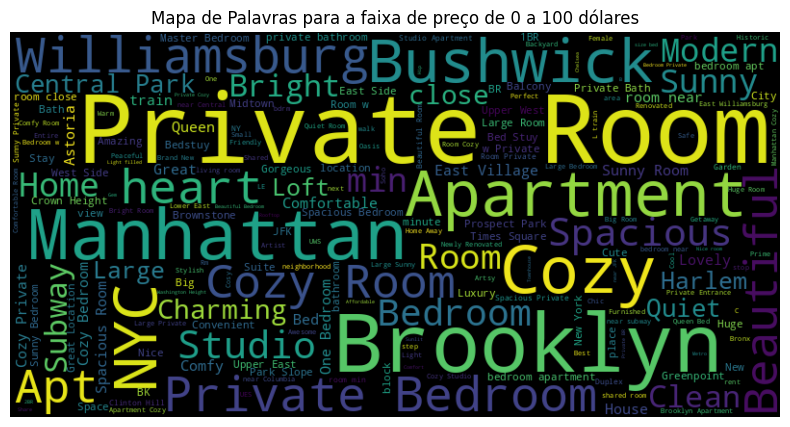

In [184]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '0-100']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 0 a 100 dólares')
plt.show()


A análise do mapa de palavras para a faixa de preço de 0-100 dólares revela padrões distintos que refletem as prioridades e características mais valorizadas pelos anfitriões:

1. **Tipos de Acomodações:**
   - Há uma prevalência de palavras relacionadas aos tipos de acomodações, como "Room" (Quarto), "Bedroom" (Quarto), "Apartment" (Apartamento), "Loft" e "Studio" (Estúdio). Isso sugere que os anfitriões nesta faixa de preço estão destacando especificamente o formato e a natureza da hospedagem oferecida.

2. **Adjetivos Descritivos:**
   - Adjetivos como "Cozy" (Aconchegante), "Private" (Privado), "Spacious" (Espaçoso), "Beautiful" (Bonito) e "Clean" (Limpo) são proeminentes. Isso indica que os anfitriões enfatizam características que tornam a estadia agradável e confortável, mesmo em propriedades de preço mais acessível.

3. **Nomes de Lugares/Localizações:**
   - Nomes de bairros e locais específicos, como "Manhattan," "Brooklyn," "Williamsburg," "Bushwick" e "Central Park," são notáveis. Isso sugere que a localização é um fator crucial, e os anfitriões querem atrair potenciais hóspedes destacando a proximidade com áreas populares ou icônicas.

4. **Outros Termos Relevantes:**
   - Termos como "NYC" (Nova York) e "Subway" (Metrô) indicam a ênfase na cidade em si e na conveniência do transporte público. Isso pode atrair visitantes que buscam uma experiência autêntica na cidade e fácil acesso aos meios de transporte.


### 5.3.2 Faixa de 101 a 200 dólares

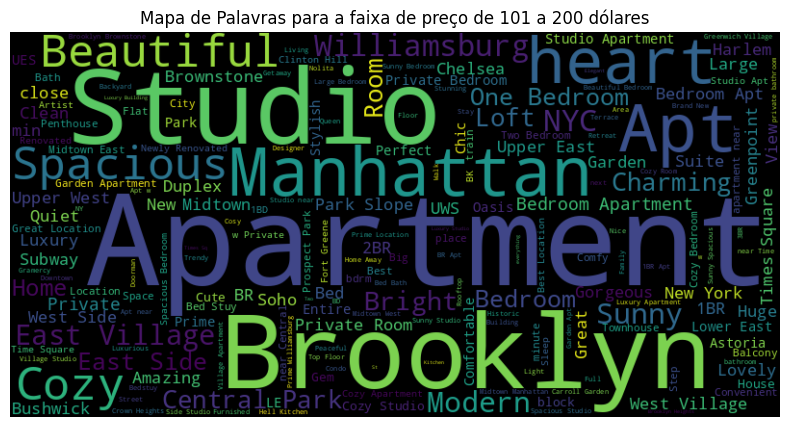

In [185]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '101-200']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 101 a 200 dólares')
plt.show()


A análise do mapa de palavras para a faixa de preço de 101 a 200 dólares revela padrões distintos que refletem as prioridades e características mais valorizadas pelos anfitriões nesta faixa intermediária:

1. **Tipos de Acomodações:**
   - Destacam-se palavras como "Studio" (Estúdio), "Apartment" (Apartamento) e "Loft", indicando a prevalência desses tipos de acomodações nessa faixa de preço. Os anfitriões nesta categoria parecem querer comunicar a diversidade de opções disponíveis, desde estúdios até lofts.

2. **Adjetivos Descritivos:**
   - Adjetivos como "Beautiful" (Bonito), "Spacious" (Espaçoso), "Cozy" (Aconchegante) e "Modern" (Moderno) são frequentemente utilizados. Isso sugere uma ênfase na qualidade estética e no conforto, indicando que os anfitriões buscam atrair hóspedes que valorizam ambientes agradáveis e contemporâneos.

3. **Nomes de Lugares/Localizações:**
   - Assim como na faixa de preço mais baixa, nomes de bairros e localizações específicas como "Manhattan," "Brooklyn," "Williamsburg," "Bushwick" e "Upper West" são proeminentes. Isso indica a importância da localização, possivelmente associada à conveniência, atrativos culturais e características únicas dessas áreas.

4. **Características das Acomodações:**
   - Termos como "Garden" (Jardim), "Penthouse" e tipos como "1BR" (um quarto) estão presentes, indicando que os anfitriões nesta faixa de preço destacam características específicas das acomodações. Isso sugere uma abordagem mais detalhada na descrição, visando chamar a atenção para características exclusivas que podem influenciar a decisão do hóspede.


### 5.3.3 Faixa de 201 a 500 dólares

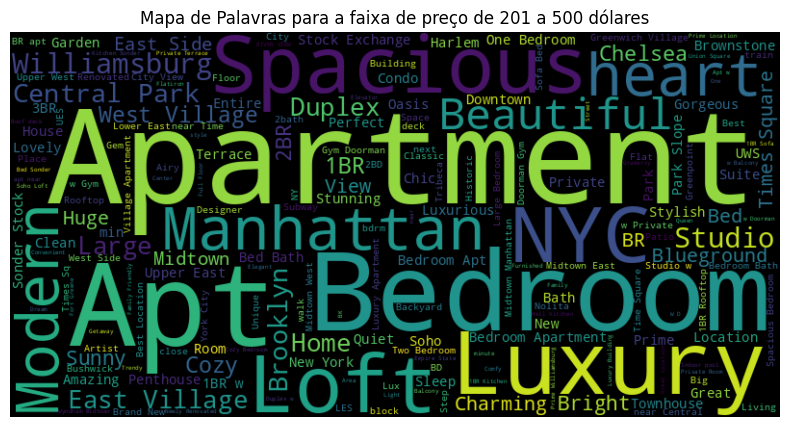

In [186]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '201-500']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 201 a 500 dólares')
plt.show()

O mapa de palavras para a faixa de preço de 201 a 500 dólares mostra:

- **Localizações**: Palavras como "Manhattan," "NYC," "Brooklyn," "East Village," e "Central Park" são proeminentes, indicando que essas são localizações populares para acomodações nessa faixa de preço.

- **Tipos de acomodações e características**: Palavras como "Apartment" (Apartamento), "Bedroom" (Quarto), "Luxury" (Luxo), e "Modern" (Moderno) são destacadas, sugerindo que essas são características ou tipos de acomodações comuns nessa faixa de preço.

- **Adjetivos descritivos**: Adjetivos como “Cozy” (Aconchegante), “Sunny” (Ensolarado), “Huge” (Grande), e “Beautiful” (Bonito) são usados frequentemente, sugerindo que essas são características desejáveis nessas acomodações de preço intermediário.

- **Características das acomodações**: Termos como “View” (Vista), “Garden” (Jardim), e “Terrace” (Terraço) estão presentes, sugerindo que essas características podem ser comuns em acomodações nessa faixa de preço.



### 5.3.4 Faixa de 501 a 1000 dólares

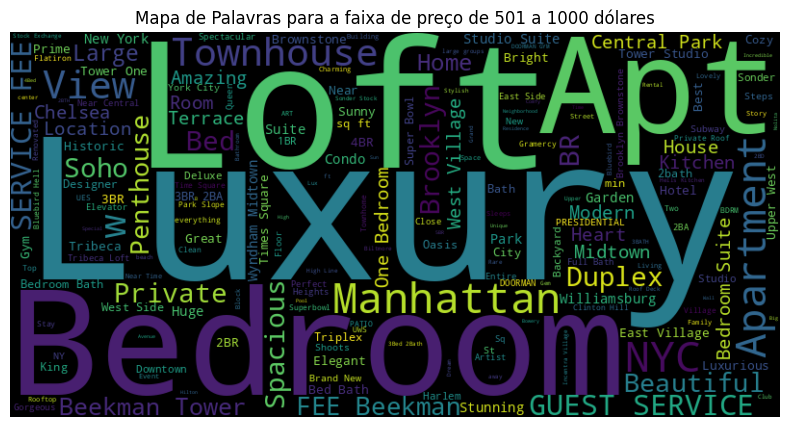

In [187]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '501-1000']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 501 a 1000 dólares')
plt.show()

O mapa de palavras para a faixa de preço de 501 a 1000 dólares mostra várias palavras que são comumente usadas nos nomes dos locais nessa faixa de preço:

- **Tipos de acomodações e características**: Palavras como "Townhouse" (Casa geminada), "Penthouse" (Cobertura), "Bedroom" (Quarto), "Private Room" (Quarto privado), e "Duplex" são destacadas, sugerindo que essas são características ou tipos de acomodações comuns nessa faixa de preço.

- **Adjetivos descritivos**: Adjetivos como “Spacious” (Espaçoso), “Large” (Grande), e “Beautiful” (Bonito) são usados frequentemente, sugerindo que essas são características desejáveis nessas acomodações de preço intermediário.

- **Localizações**: Palavras como “Central Park,” “Soho,” “Midtown,” “Chelsea,” e “Tribeca” aparecem no mapa de palavras, indicando que essas são localizações populares para acomodações nessa faixa de preço.

- **Outros termos relevantes**: Termos como “View” (Vista), “Amazing” (Incrível), e “FEE” (Taxa) estão presentes, sugerindo que essas características ou condições podem ser comuns em acomodações nessa faixa de preço.



### 5.3.5 Faixa de 1001 a 2000 dólares

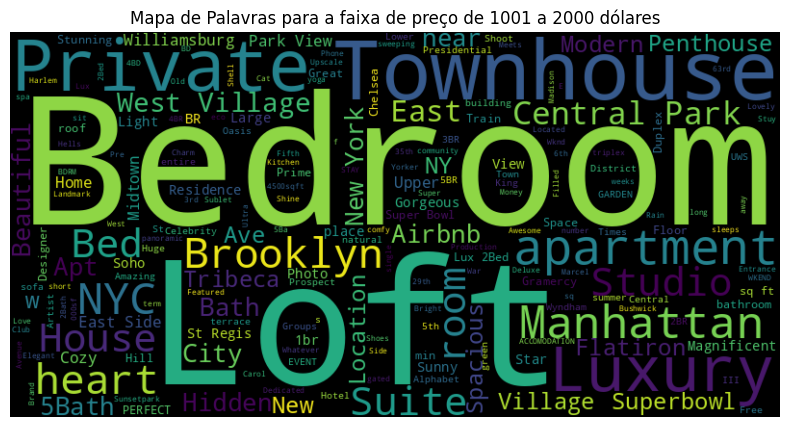

In [189]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '1001-2000']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço de 1001 a 2000 dólares')
plt.show()

O mapa de palavras para a faixa de preço de 1001 a 2000 dólares mostra várias palavras que são comumente usadas nos nomes dos locais nessa faixa de preço:

- **Tipos de acomodações**: Palavras como "Bedroom" (Quarto), "Loft", e "Apartment" (Apartamento) são proeminentes, indicando que esses tipos de acomodações são comuns nessa faixa de preço.

- **Localizações**: Palavras como “Brooklyn” e “Manhattan” aparecem no mapa de palavras, indicando que essas são localizações populares para acomodações nessa faixa de preço.

- **Outros termos relevantes**: Outros termos que aparecem no mapa de palavras incluem “Private” (Privado), “Park” (Parque), e “View” (Vista), que podem se referir a características desejáveis das acomodações.


5.3.6 Faixa acima de 2000 dólares

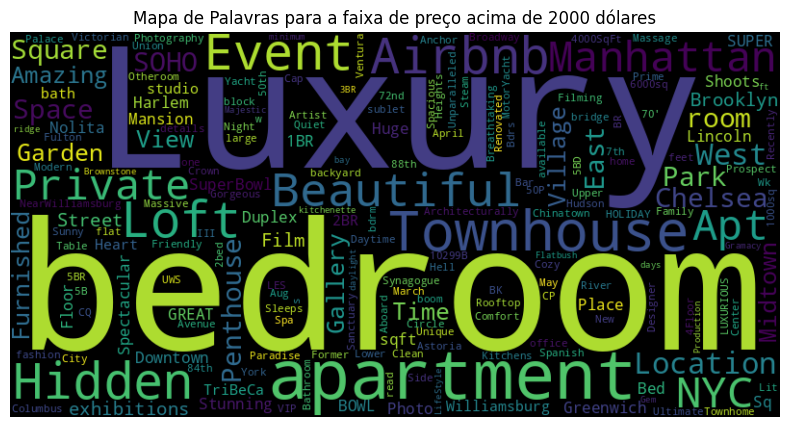

In [190]:
# Filtrando o DataFrame para apenas os locais nesse range de preço
df_filtered = df[df['price_range'] == '2000+']

# Juntando todos os nomes dos locais em uma única string
text = ' '.join(df_filtered['nome'])

# Criando o mapa de palavras
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrando o mapa de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Palavras para a faixa de preço acima de 2000 dólares')
plt.show()

O mapa de palavras para a faixa de preço acima de 2000 dólares mostra várias palavras que são comumente usadas nos nomes dos locais nessa faixa de preço:

- **Tipos de acomodações e características**: Palavras como "Bedroom" (Quarto), "Apartment" (Apartamento), e "Luxury" (Luxo) são proeminentes, indicando que esses tipos de acomodações são comuns nessa faixa de preço.

- **Localizações**: Palavras como “Manhattan,” “Brooklyn,” “SOHO,” “Harlem,” e “Chelsea” aparecem no mapa de palavras, indicando que essas são localizações populares para acomodações nessa faixa de preço.

- **Outros termos relevantes**: Outros termos que aparecem no mapa de palavras incluem “Private” (Privado), “View” (Vista), “Space” (Espaço), “Garden” (Jardim), e “Beautiful” (Bonito), que podem se referir a características desejáveis das acomodações.



> Essas observações sugerem que, para todas as acomodações, independente de preço, os anfitriões tendem a enfatizar o tipo de acomodação, a localização e certas características desejáveis em seus nomes de locais.

# **6. SUJESTÃO DE PREÇO**

In [207]:
# Carregando os dados
df = pd.read_csv('teste_indicium_precificacao.csv')

# Selecionando as características para o modelo
features = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']
X = df[features]
y = df['price']

# Substituindo os valores NaN pela média da coluna correspondente
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões com o modelo
y_pred = model.predict(X_test)



MSE: 48157.65108878419
Preço sugerido: 220.2918533057382


In [208]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 48157.65108878419


In [211]:
# Usando o modelo para prever o preço de um novo apartamento
new_apartment = pd.DataFrame([{'latitude': 40.75362,
                               'longitude': -73.98377,
                               'minimo_noites': 1,
                               'numero_de_reviews': 45,
                               'reviews_por_mes': 0.38,
                               'calculado_host_listings_count': 2,
                               'disponibilidade_365': 355}])
predicted_price = model.predict(new_apartment)
print(f'Preço sugerido: $ {predicted_price[0]:.2f}')

Preço sugerido: $ 220.29


# **7. SALVANDO O MODELO**

In [212]:
# Após treinar e avaliar o modelo, salvando utilizando a biblioteca pickle em formato .pkl
with open('modelo_precificacao.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
